In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt 
import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sns
from scipy import stats
import matplotlib.ticker as ticker
import holidays
from datetime import date 
import datetime
import matplotlib.cbook as cbook
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures














In [2]:
bhw = pd.read_csv('CBS_2021-2023_Hourly_Weather_new.csv', sep=',')
bhw.head(10)

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h),season,warm_days,Holiday,weather_condition,is_weekend
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,Winter,No,Yes,clear sky,False
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,Winter,No,Yes,clear sky,False
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,Winter,No,Yes,clear sky,False
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,Winter,No,Yes,clear sky,False
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,Winter,No,Yes,clear sky,False
5,11.0,2021-01-01,5,3.0,14.0,75,1.4,2,8.7,Winter,No,Yes,clear sky,False
6,8.0,2021-01-01,6,18.0,26.0,72,1.4,2,8.9,Winter,No,Yes,clear sky,False
7,10.0,2021-01-01,7,17.0,27.0,71,1.4,3,7.9,Winter,No,Yes,clear sky,False
8,22.0,2021-01-01,8,33.0,55.0,71,1.4,3,7.1,Winter,No,Yes,clear sky,False
9,22.0,2021-01-01,9,54.0,76.0,70,1.6,3,7.2,Winter,No,Yes,clear sky,False


In [10]:
#bhw.drop(['Unnamed: 0'], axis=1, inplace=True)

In [15]:
bhw.head()

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h),season,warm_days,Holiday,weather_condition
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,Winter,No,Yes,clear sky
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,Winter,No,Yes,clear sky
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,Winter,No,Yes,clear sky
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,Winter,No,Yes,clear sky
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,Winter,No,Yes,clear sky


In [12]:
#bhw.to_csv('CBS_2021-2023_Hourly_Weather_new.csv', index=False)

In [31]:
bhw['Date'] = pd.to_datetime(bhw['Date'])
bhw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26269 entries, 0 to 26268
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Casual                   26269 non-null  float64       
 1   Date                     26269 non-null  datetime64[ns]
 2   Hour                     26269 non-null  int64         
 3   Member                   26269 non-null  float64       
 4   Total_rides              26269 non-null  float64       
 5   relativehumidity_2m (%)  26269 non-null  int64         
 6   temperature_2m (°C)      26269 non-null  float64       
 7   weathercode (wmo code)   26269 non-null  int64         
 8   windspeed_10m (km/h)     26269 non-null  float64       
 9   season                   26269 non-null  object        
 10  warm_days                26269 non-null  object        
 11  Holiday                  26269 non-null  object        
 12  weather_condition        26269 n

In [7]:
#defining and creating season column
'''def assign_season(row):
    month = row['Date'].month
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter' '''
    


In [8]:
#applying the season column to the dataset
#bhw['season'] = bhw.apply(assign_season, axis=1)


In [9]:
#creatig 'warm_days' column setting binary values as str
#bhw['warm_days'] = bhw['temperature_2m (°C)'].apply(lambda value: 'Yes'
#if value >= 12 else 'No')
#bhw.head()

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h),season,warm_days
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,Winter,No
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,Winter,No
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,Winter,No
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,Winter,No
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,Winter,No


In [10]:
#us_holidays = holidays.US()
#bhw['Holiday'] = bhw['Date'].apply(lambda x: x in us_holidays)
#bhw['Holiday'] = bhw['Holiday'].map({True: 'Yes', False: 'No'})
#bhw.head()



,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h),season,warm_days,Holiday
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,Winter,No,Yes
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,Winter,No,Yes
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,Winter,No,Yes
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,Winter,No,Yes
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,Winter,No,Yes


In [4]:
bhw.isna().sum()

Casual                     0
Date                       0
Hour                       0
Member                     0
Total_rides                0
relativehumidity_2m (%)    0
temperature_2m (°C)        0
weathercode (wmo code)     0
windspeed_10m (km/h)       0
season                     0
warm_days                  0
Holiday                    0
weather_condition          0
is_weekend                 0
dtype: int64

In [18]:
#bhw.loc[bhw['Casual'].isna()]

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h),season,warm_days,Holiday,weather_condition


In [13]:
#bhw.dropna(subset=['Casual', 'Member', 'Total_rides'],inplace=True) 


assigning weather condition according to wcode

In [14]:
def assign_weather(row):
    wc = row['weathercode (wmo code)']
    if 0 <= wc <= 3:
        return 'clear sky'
    elif 51 <= wc <= 55:
        return 'drizzle'
    elif 61 <= wc <= 65:
        return 'rain'
    else:
        return 'snowflakes'
    


In [15]:
bhw['weather_condition'] = bhw.apply(assign_weather, axis=1)


<Axes: xlabel='Hour', ylabel='Total_rides'>

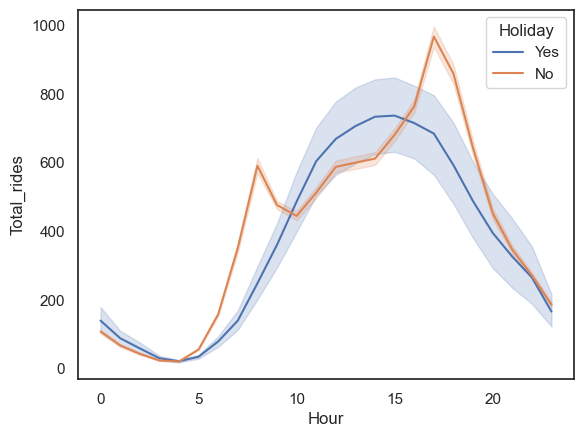

In [111]:
sns.lineplot(data=bhw, x='Hour', y='Total_rides', estimator='mean', hue='Holiday')

<Axes: xlabel='windspeed_10m (km/h)', ylabel='Member'>

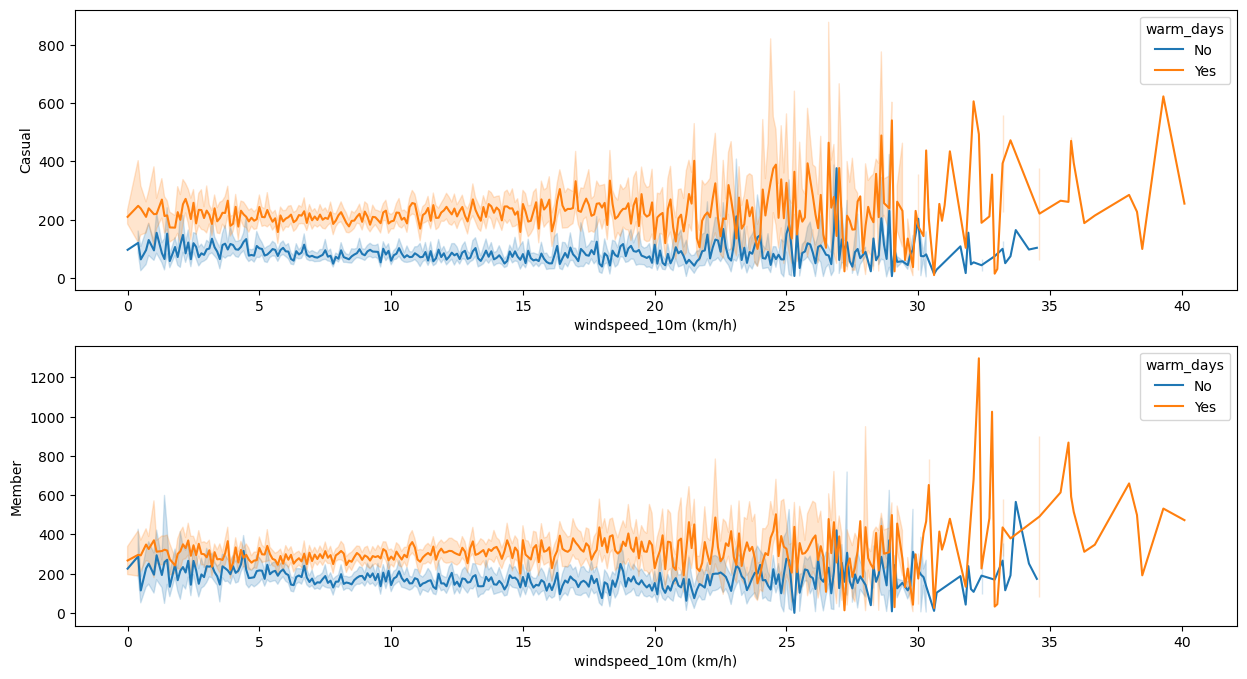

In [6]:
fig, axes = plt.subplots(nrows= 2 , ncols= 1, figsize = (15,8))
sns.lineplot(data=bhw, ax=axes[0], x='windspeed_10m (km/h)', y='Casual', hue='warm_days')
sns.lineplot(data=bhw, ax=axes[1], x='windspeed_10m (km/h)', y='Member', hue='warm_days')

<Axes: xlabel='Hour', ylabel='Member'>

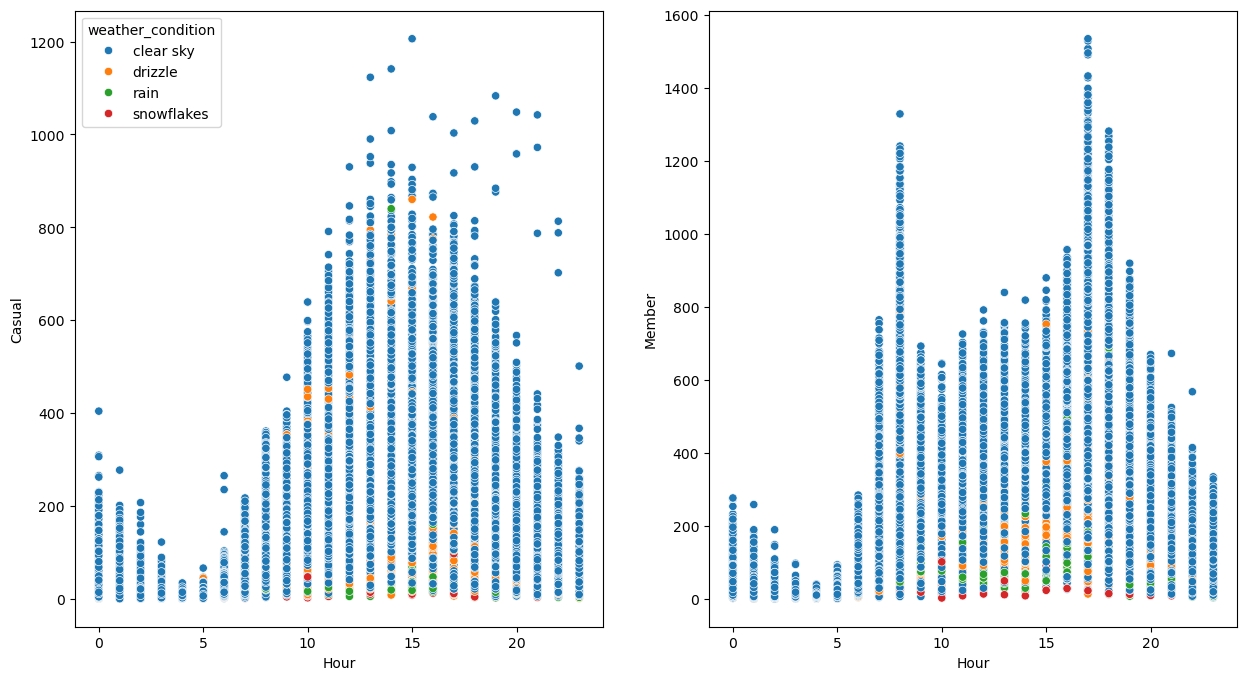

In [25]:
fig, axes = plt.subplots(nrows= 1 , ncols= 2, figsize = (15,8))
sns.scatterplot(data=bhw, x='Hour', ax=axes[0], y='Casual', hue='weather_condition')
sns.scatterplot(data=bhw, x='Hour', ax=axes[1], y='Member', hue='weather_condition', legend=False)

<Axes: xlabel='Hour', ylabel='Member'>

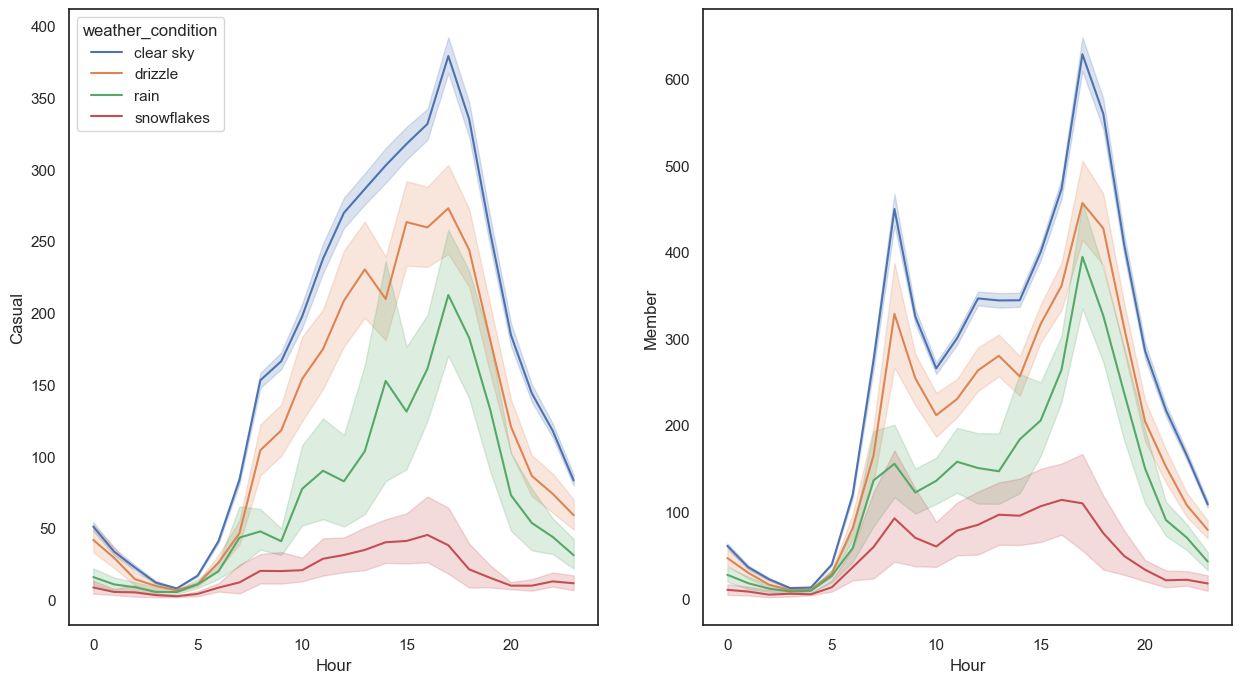

In [130]:
fig, axes = plt.subplots(nrows= 1 , ncols= 2, figsize = (15,8))
sns.lineplot(data=bhw, x='Hour', ax=axes[0], y='Casual', hue='weather_condition')
sns.lineplot(data=bhw, x='Hour', ax=axes[1], y='Member', hue='weather_condition', legend=False)

<Axes: xlabel='Hour', ylabel='Casual'>

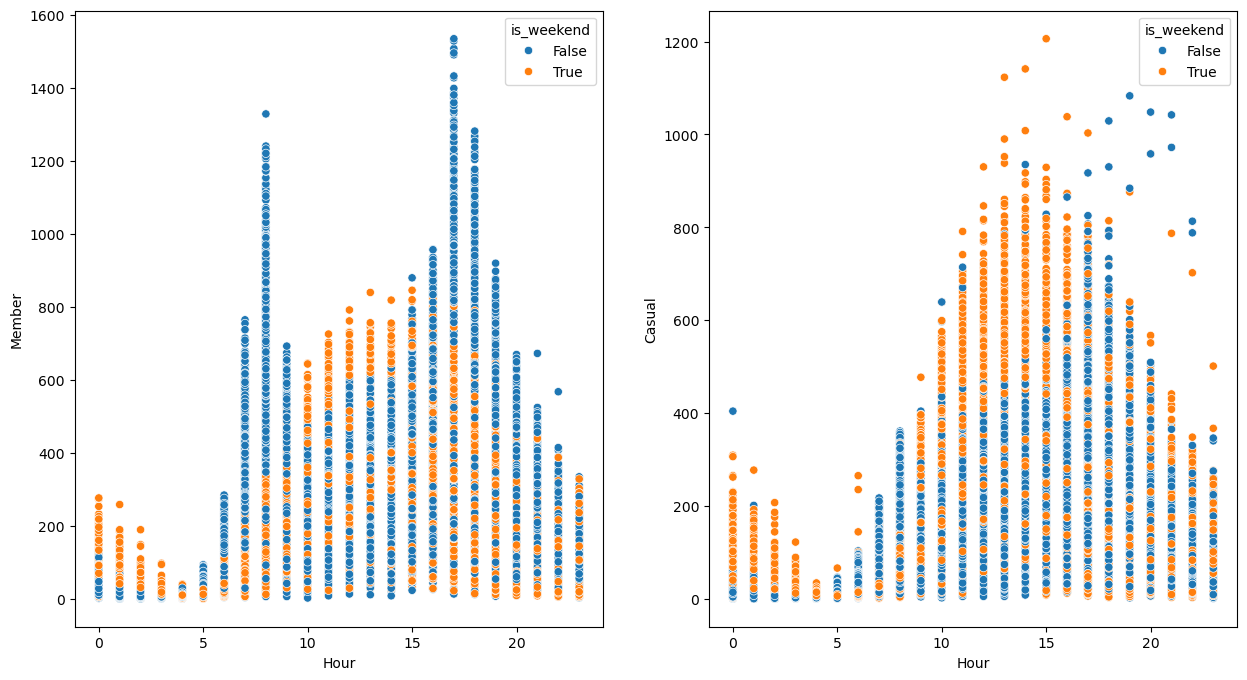

In [3]:
fig, axes = plt.subplots(nrows= 1 , ncols= 2, figsize = (15,8))
sns.scatterplot(data=bhw, ax=axes[0], x='Hour', y="Member", hue="is_weekend")
sns.scatterplot(data=bhw, ax=axes[1], x='Hour', y='Casual', hue='is_weekend')


In [55]:
bhw.columns

Index(['Casual', 'Date', 'Hour', 'Member', 'Total_rides',
       'relativehumidity_2m (%)', 'temperature_2m (°C)',
       'weathercode (wmo code)', 'windspeed_10m (km/h)', 'season', 'warm_days',
       'Holiday', 'weather_condition', 'is_weekend'],
      dtype='object')

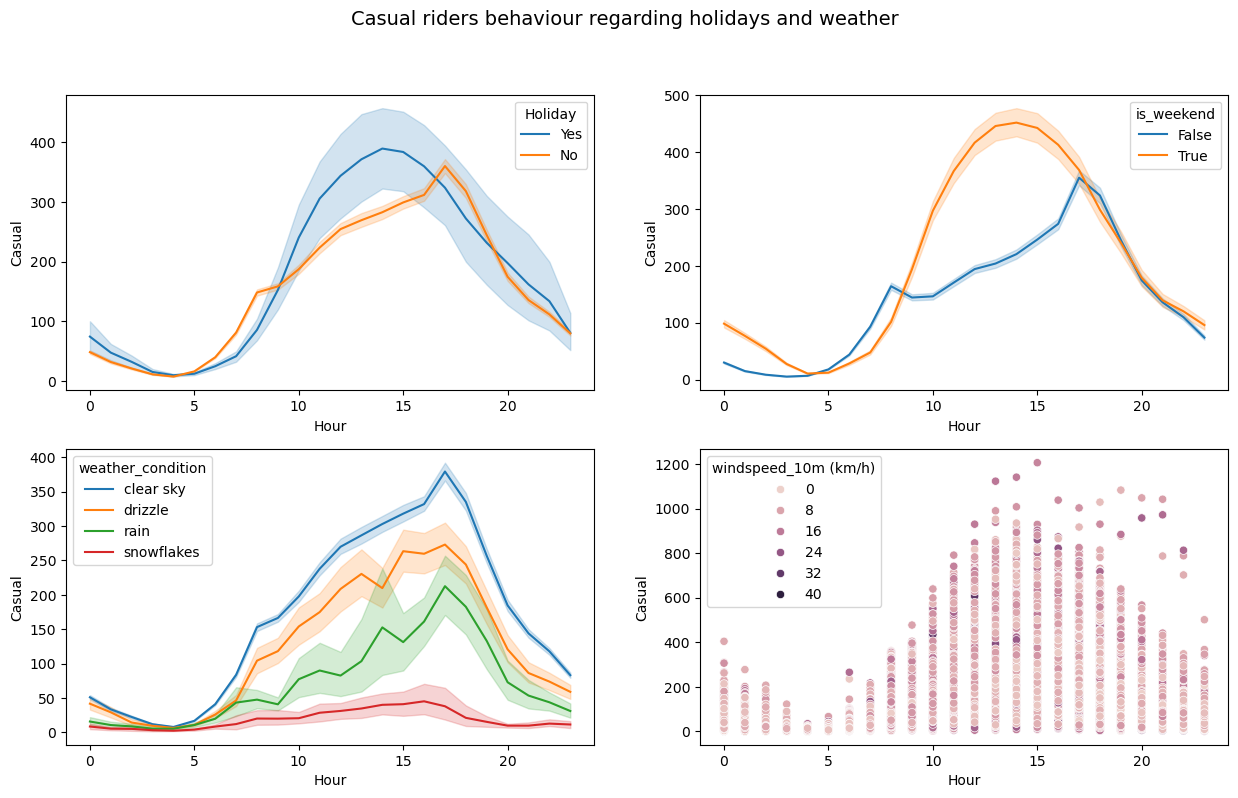

In [66]:
fig, axes = plt.subplots(nrows= 2 , ncols= 2, figsize = (15,10))

sns.lineplot(data=bhw, ax=axes[0,0], x='Hour', y="Casual", hue='Holiday')
sns.lineplot(data=bhw, ax=axes[0,1], x='Hour', y="Casual", hue='is_weekend')
sns.lineplot(data=bhw, ax=axes[1,0], x='Hour', y="Casual", hue='weather_condition')
sns.scatterplot(data=bhw, ax=axes[1,1], x='Hour', y="Casual", hue='windspeed_10m (km/h)')
fig.text(0.5, 0.92,'Casual riders behaviour regarding holidays and weather ', ha='center',fontsize=14)
fig.subplots_adjust(top=0.85, bottom=0.2, hspace=0.2)





<Axes: xlabel='Hour', ylabel='Casual'>

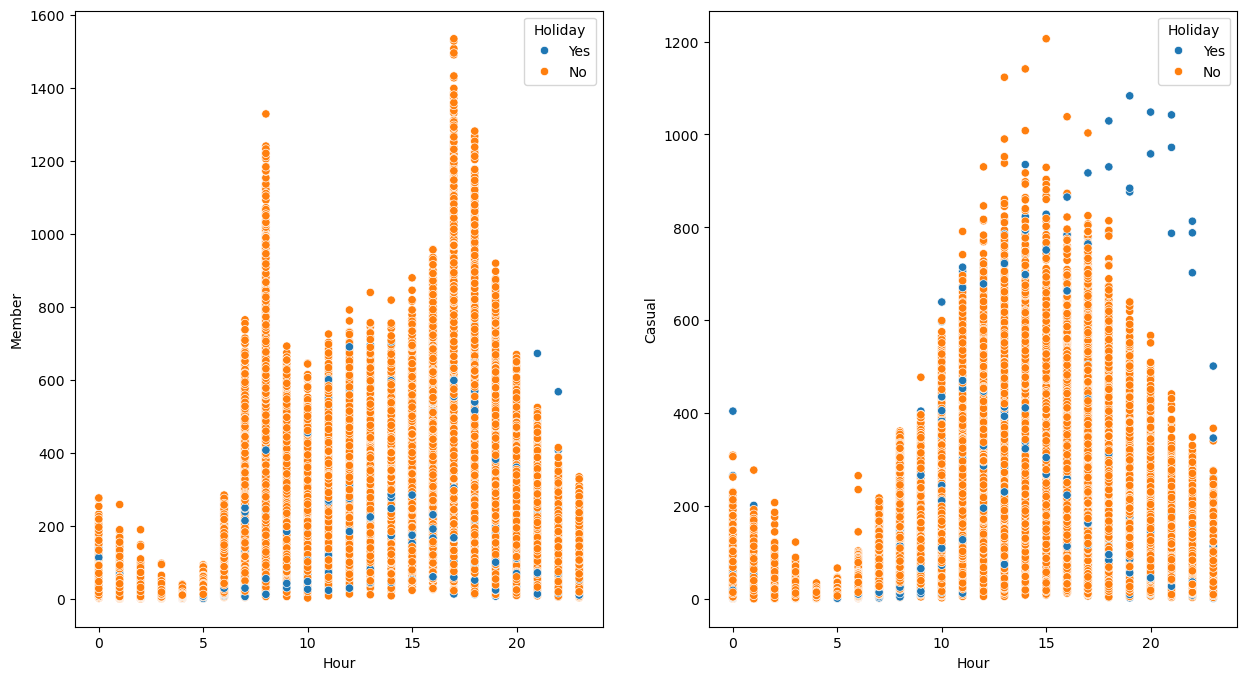

In [53]:
fig, axes = plt.subplots(nrows= 1 , ncols= 2, figsize = (15,8))
sns.scatterplot(data=bhw, ax=axes[0], x='Hour', y="Member", hue="Holiday")
sns.scatterplot(data=bhw, ax=axes[1], x='Hour', y='Casual', hue='Holiday')


<Axes: xlabel='Hour', ylabel='Casual'>

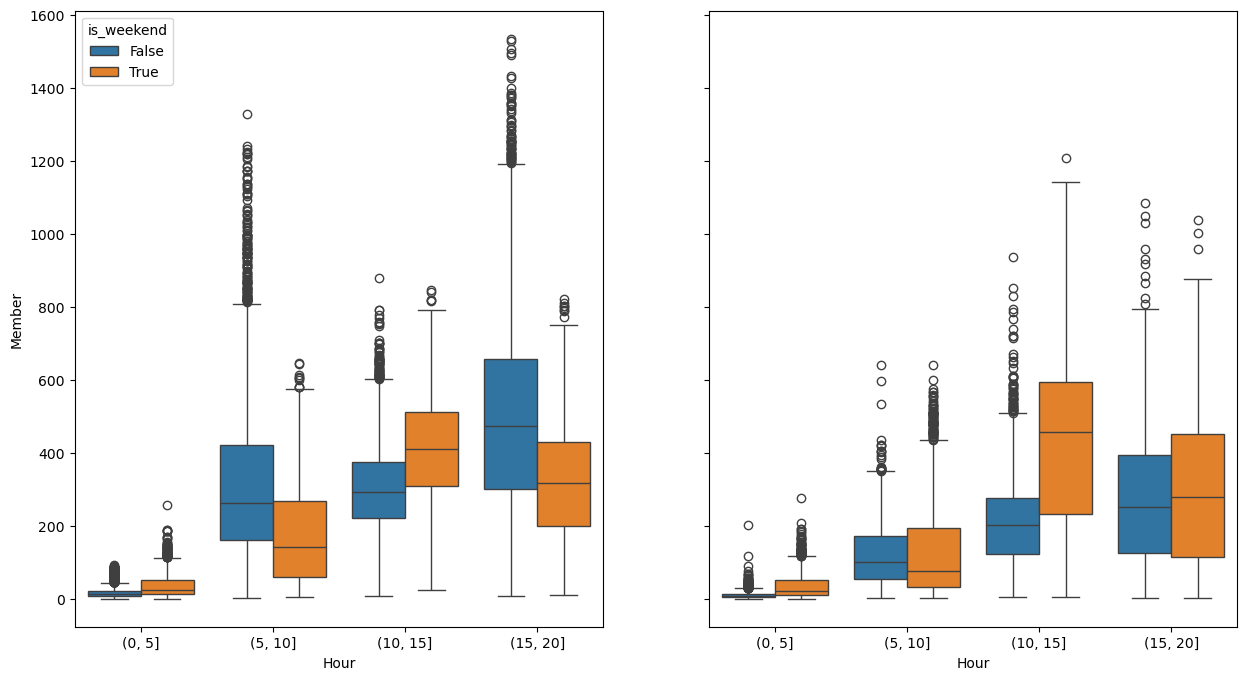

In [29]:
fig, axes = plt.subplots(nrows= 1 , ncols= 2, figsize = (15,8), sharey=True)
sns.boxplot(data=bhw, ax=axes[0], x=pd.cut(bhw['Hour'], bins=range(0, 24, 5), right=True), y="Member", hue="is_weekend")
sns.boxplot(data=bhw, ax=axes[1], x=pd.cut(bhw['Hour'], bins=range(0, 25, 5), right=True), y='Casual', hue="is_weekend", legend=False)


adding weekend or not condition

In [24]:
def is_weekend(date):
    week_day = date.weekday()
    return week_day >= 5


In [26]:
bhw['is_weekend']=bhw['Date'].apply(is_weekend)
bhw.head()

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h),season,warm_days,Holiday,weather_condition,is_weekend
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,Winter,No,Yes,clear sky,False
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,Winter,No,Yes,clear sky,False
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,Winter,No,Yes,clear sky,False
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,Winter,No,Yes,clear sky,False
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,Winter,No,Yes,clear sky,False


In [28]:
#bhw.to_csv('CBS_2021-2023_Hourly_Weather_new.csv',index=False)

<Axes: xlabel='Hour', ylabel='Total_rides'>

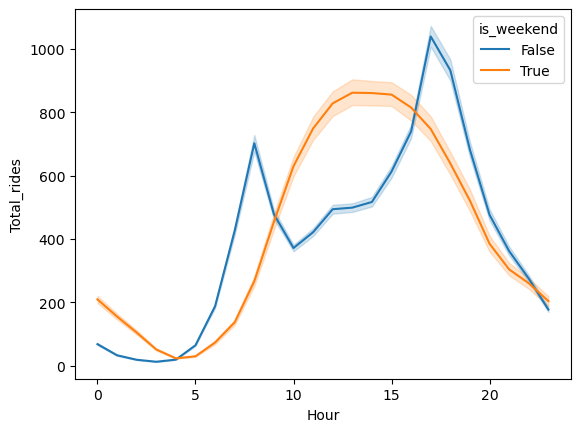

In [14]:
sns.lineplot(data=bhw, x='Hour', y='Total_rides', hue='is_weekend')

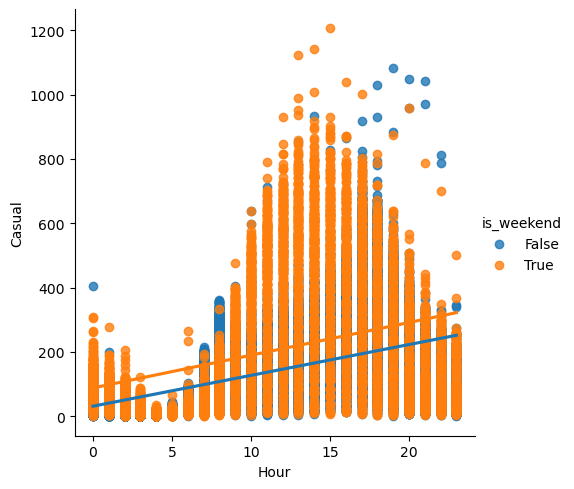

In [4]:
sns.lmplot(data=bhw, x='Hour', y='Casual', hue='is_weekend', ci=None)

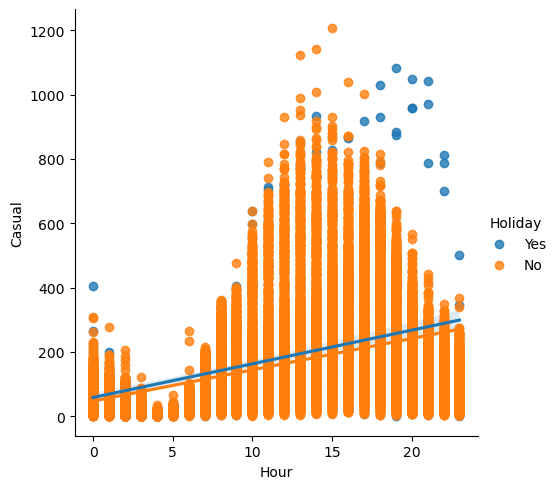

In [134]:
sns.lmplot(data=bhw, y='Casual', x='Hour', hue='Holiday')

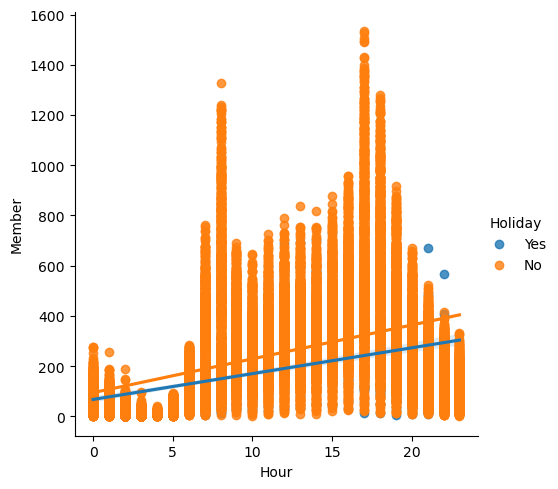

In [51]:
sns.lmplot(data=bhw, y='Member', x='Hour', hue='Holiday')

In [30]:
bhw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26269 entries, 0 to 26268
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Casual                   26269 non-null  float64
 1   Date                     26269 non-null  object 
 2   Hour                     26269 non-null  int64  
 3   Member                   26269 non-null  float64
 4   Total_rides              26269 non-null  float64
 5   relativehumidity_2m (%)  26269 non-null  int64  
 6   temperature_2m (°C)      26269 non-null  float64
 7   weathercode (wmo code)   26269 non-null  int64  
 8   windspeed_10m (km/h)     26269 non-null  float64
 9   season                   26269 non-null  object 
 10  warm_days                26269 non-null  object 
 11  Holiday                  26269 non-null  object 
 12  weather_condition        26269 non-null  object 
 13  is_weekend               26269 non-null  bool   
dtypes: bool(1), float64(5)

In [82]:
bhw.select_dtypes(include='number')

,Casual,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h)
0,20.0,0,26.0,46.0,90,2.4,1,10.2
1,23.0,1,23.0,46.0,88,1.8,1,10.0
2,20.0,2,28.0,48.0,87,1.1,2,10.1
3,9.0,3,7.0,16.0,81,1.6,2,10.6
4,7.0,4,5.0,12.0,77,1.6,2,9.9
...,...,...,...,...,...,...,...,...
26275,132.0,19,190.0,322.0,71,-7.7,0,3.3
26276,125.0,20,194.0,319.0,79,-10.2,0,6.7
26277,84.0,21,137.0,221.0,80,-11.0,0,10.0
26278,83.0,22,142.0,225.0,80,-10.4,0,8.7


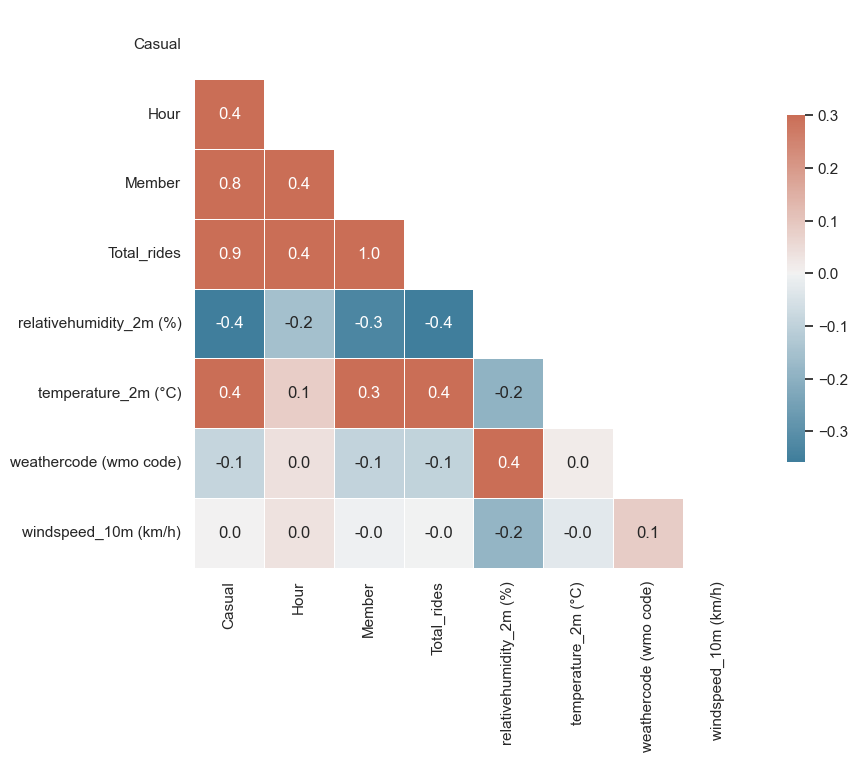

In [27]:
sns.set_theme(style="white")
corr = bhw.select_dtypes(include='number').corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(9, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax = sns.heatmap(
    corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot=True, fmt=".1f",
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [99]:
bhw.columns

Index(['Casual', 'Date', 'Hour', 'Member', 'Total_rides',
       'relativehumidity_2m (%)', 'temperature_2m (°C)',
       'weathercode (wmo code)', 'windspeed_10m (km/h)', 'season', 'warm_days',
       'Holiday', 'weather_condition', 'is_weekend'],
      dtype='object')

Multivariate_LR

In [3]:

# Define your features (X) and target (y)
X = bhw.drop(['season','warm_days','Holiday','is_weekend','weather_condition', 'Casual','Date','Total_rides','Member','Hour','weathercode (wmo code)','windspeed_10m (km/h)','relativehumidity_2m (%)'], axis=1) #Features
y = bhw[['Casual']]    # Target




In [4]:
X.columns

Index(['temperature_2m (°C)'], dtype='object')

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model

#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
linreg_model = linear_model.LinearRegression()
linreg_model.fit(X_train, y_train)


LinearRegression()

In [93]:
y_pred = linreg_model.predict(X_test)  # Predict Linear Model

In [94]:
from sklearn.metrics import mean_squared_error,r2_score

print("R2 Score: " +"{:.3}".format(r2_score(y_test,y_pred)))
print("MSE: " +"{:.3}".format(mean_squared_error(y_test, y_pred)))

R2 Score: 0.202
MSE: 2.27e+04


In [95]:
X_test.shape

(5254, 1)

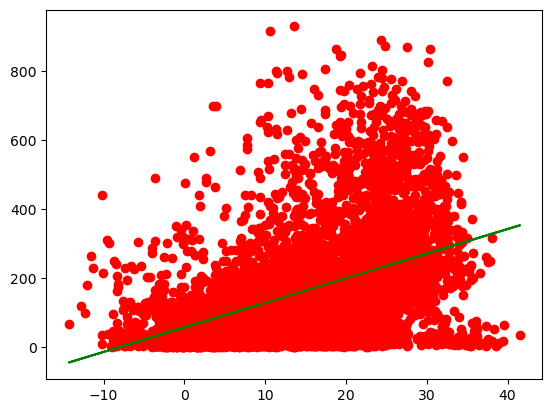

In [97]:
# Finally draw figure of Linear Regression Model

plt.scatter(X_test, y_test, color='r')
plt.plot(X_test, y_pred, color='g')
plt.show()

c:\Users\media\anaconda3\envs\My_environment\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


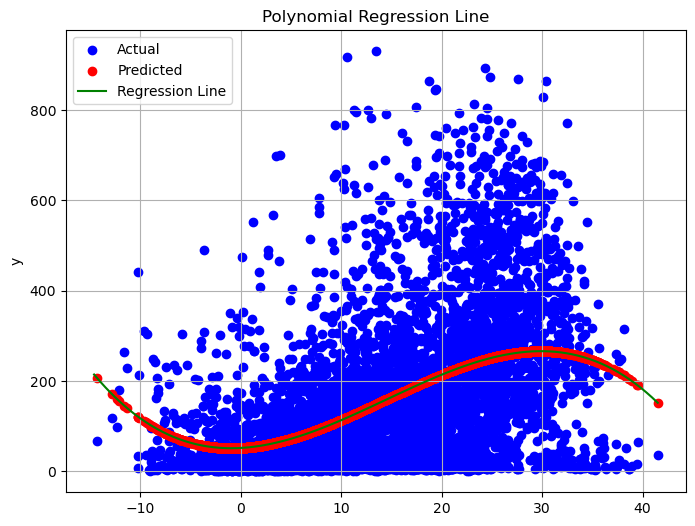

In [25]:
# Extract predictors and target variable
X = bhw[['temperature_2m (°C)']]
y = bhw['Casual']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predictions on the test set for the current independent variable
y_pred = model.predict(X_test_poly)

plt.figure(figsize=(8, 6))

# Create a scatter plot of actual vs. predicted values for the current independent variable
plt.scatter(X_test, y_test, label='Actual', color='blue')
plt.scatter(X_test, y_pred, label='Predicted', color='red')

# Generate values for the current independent variable to plot the polynomial regression line
x_range = np.linspace(X.min(), X.max(), 100)
x_range_poly = poly.transform(x_range.reshape(-1, 1))
y_range_pred = model.predict(x_range_poly)

plt.plot(x_range, y_range_pred, label='Regression Line', color='green')
plt.xlabel
plt.ylabel("y")
plt.legend()
plt.title("Polynomial Regression Line")
plt.grid(True)

plt.show()

In [26]:
x = bhw[['temperature_2m (°C)', 'Hour','Total_rides']]
y = bhw['Casual'] 

#split the data in train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [27]:
#Transform the x data for a 2nd degree polynomial
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

#fit the LR model
linreg_model2 = LinearRegression()
linreg_model2.fit(x_poly,y)

#predict for visualization
y_poly_pred = linreg_model2.predict(x_poly)

In [28]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
x_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

linreg_model2 = LinearRegression()
linreg_model2.fit(x_poly,y_train)

y_poly_pred = linreg_model2.predict(X_test_poly)


In [ ]:
#X_sorted, y_poly_pred_sorted = zip(*sorted(zip(x, y_poly_pred), key=lambda e: e[0]))

plt.figure(figsize=(15,10))
plt.scatter(X_test, y_test, s=30, color='blue')
plt.scatter(X_test, y_poly_pred, s=30, color = 'orange')

#plt.plot(X_sorted, y_poly_pred_sorted, color='r')
plt.show()

R-squared (R²) of Best Fit Curve: 0.915


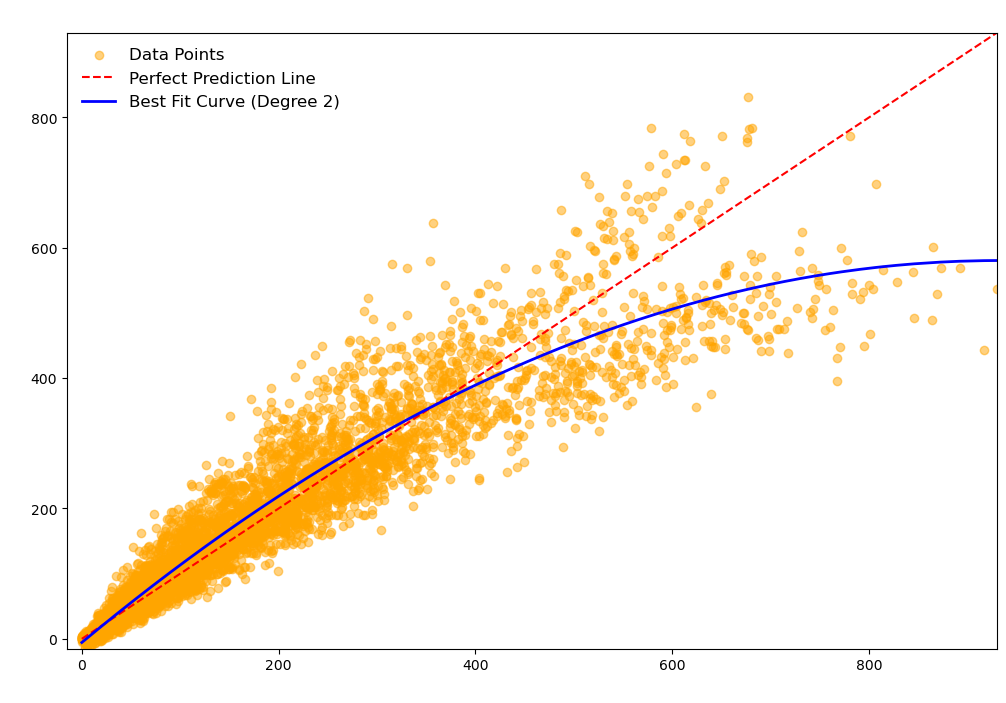

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np


# Define features and target
x = bhw[['temperature_2m (°C)', 'Hour', 'Total_rides']]
y = bhw['Casual']  # Use a Series instead of DataFrame

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Transform the features for a 2nd degree polynomial
degree_features = 2  # Degree for feature transformation
poly_features = PolynomialFeatures(degree=degree_features)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Fit the Linear Regression model
linreg_model = LinearRegression()
linreg_model.fit(X_train_poly, y_train)

# Predict on the test set
y_pred = linreg_model.predict(X_test_poly)

# ------------------- Custom Polynomial Regression Plot -------------------

# Convert y_test and y_pred to numpy arrays and reshape them
y_test_array = np.array(y_test).reshape(-1, 1)
y_pred_array = np.array(y_pred).reshape(-1, 1)

# Degree of the polynomial for the best fit curve
degree_curve = 2  # Adjust as needed

# Create polynomial features for y_test
poly_curve = PolynomialFeatures(degree=degree_curve)
y_test_poly = poly_curve.fit_transform(y_test_array)

# Fit the polynomial regression model
poly_reg_model = LinearRegression()
poly_reg_model.fit(y_test_poly, y_pred_array)

# Generate predictions for the best fit curve
y_fit = poly_reg_model.predict(y_test_poly)

# Sort the values for plotting
sorted_indices = y_test_array[:, 0].argsort()
y_test_sorted = y_test_array[sorted_indices]
y_fit_sorted = y_fit[sorted_indices]

# Calculate R-squared value
r2_best_fit = r2_score(y_pred_array, y_fit)
print(f"R-squared (R²) of Best Fit Curve: {r2_best_fit:.3f}")

# Scatter plot of actual vs predicted values
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred, alpha=0.5, label='Data Points', color="orange")

# Plot the perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction Line')

# Plot the polynomial best fit curve
plt.plot(y_test_sorted, y_fit_sorted, color='blue', linewidth=2, label=f'Best Fit Curve (Degree {degree_curve})')

# Set the x and y-axis labels
plt.xlabel('Actual Number of Bikes Emptied', fontsize=12, color='white')
plt.ylabel('Predicted Number of Bikes Emptied', fontsize=12, color='white')

# Set the title
plt.title(f'Polynomial Regression (Degree {degree_curve}): Actual vs. Predicted Number of Bikes Emptied', fontsize=14, color='white')

# Add a legend
plt.legend(facecolor='dimgray', frameon=False, fontsize=12)

# Adjust axis limits
min_value = min(y_test.min(), y_pred.min())
max_value = max(y_test.max(), y_pred.max())
plt.xlim([min_value, max_value])
plt.ylim([min_value, max_value])




plt.show()

In [30]:
bhw.shape

(26269, 14)

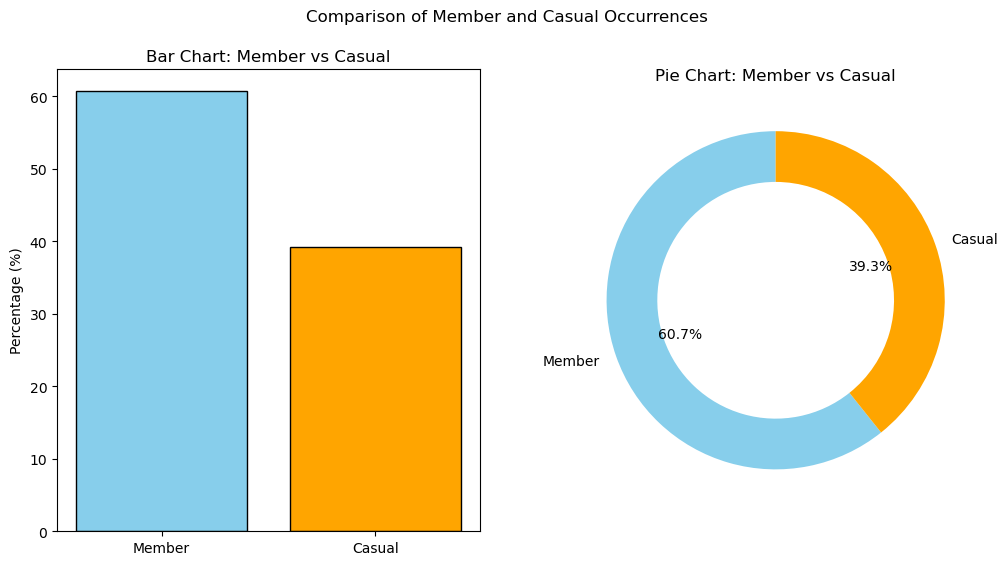

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load your dataset
# Assuming 'bhw' is already loaded as a pandas DataFrame
# data = bhw  # Uncomment if needed

# Step 2: Calculate total occurrences
# Assuming you want to compare the total occurrences of 'Member' and 'Casual'

# Calculate the sum of each column
member_total = bhw['Member'].sum()
casual_total = bhw['Casual'].sum()

# Calculate total occurrences (for calculating percentages)
total = member_total + casual_total

# Calculate percentages
member_percentage = (member_total / total) * 100
casual_percentage = (casual_total / total) * 100

# Prepare data for plotting
labels = ['Member', 'Casual']
sizes = [member_percentage, casual_percentage]

# Step 3: Create the "Bar of Pie" chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Bar Chart
ax1.bar(labels, sizes, color=['skyblue', 'orange'], edgecolor='black')
ax1.set_title('Bar Chart: Member vs Casual')
ax1.set_ylabel('Percentage (%)')

# Pie Chart
ax2.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'],
        wedgeprops=dict(width=0.3))  # Donut style
ax2.set_title('Pie Chart: Member vs Casual')

# Add a super title to the figure
plt.suptitle('Comparison of Member and Casual Occurrences')

# Display the plot
plt.show()


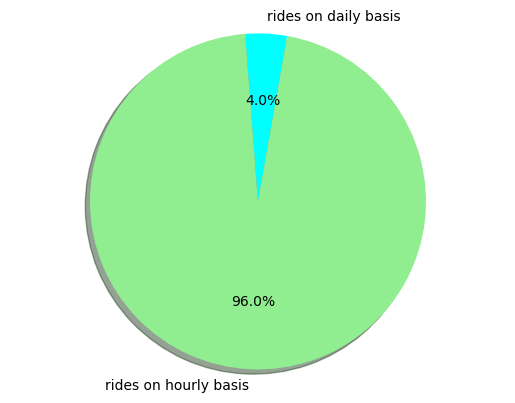

In [45]:

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'rides on daily basis', 'rides on hourly basis'
sizes = [1095,26269]
explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
colors = ['cyan', 'lightgreen']  # Customize these colors as desired

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode, labels, autopct='%1.1f%%', shadow=True, startangle=80, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [46]:
bhw.columns

Index(['Casual', 'Date', 'Hour', 'Member', 'Total_rides',
       'relativehumidity_2m (%)', 'temperature_2m (°C)',
       'weathercode (wmo code)', 'windspeed_10m (km/h)', 'season', 'warm_days',
       'Holiday', 'weather_condition', 'is_weekend'],
      dtype='object')

In [5]:
from datetime import date 
import holidays 

# Select country 
#us_holidays = holidays.US() 

# Print all the holidays in UnitedKingdom in year 2018 
#for ptr in holidays.US(years = 2021).items(): 
	#print(ptr) 


(datetime.date(2021, 1, 1), "New Year's Day")
(datetime.date(2021, 12, 31), "New Year's Day (observed)")
(datetime.date(2021, 5, 31), 'Memorial Day')
(datetime.date(2021, 6, 19), 'Juneteenth National Independence Day')
(datetime.date(2021, 6, 18), 'Juneteenth National Independence Day (observed)')
(datetime.date(2021, 7, 4), 'Independence Day')
(datetime.date(2021, 7, 5), 'Independence Day (observed)')
(datetime.date(2021, 9, 6), 'Labor Day')
(datetime.date(2021, 11, 11), 'Veterans Day')
(datetime.date(2021, 11, 25), 'Thanksgiving')
(datetime.date(2021, 12, 25), 'Christmas Day')
(datetime.date(2021, 12, 24), 'Christmas Day (observed)')
(datetime.date(2021, 1, 18), 'Martin Luther King Jr. Day')
(datetime.date(2021, 2, 15), "Washington's Birthday")
(datetime.date(2021, 10, 11), 'Columbus Day')
